# Réalisez une ACP - Le jeu de données mystère - Enoncé

# 1 Preliminary

## 1.1 Context

Ce TP est en lien avec l'activité [Réalisez une ACP](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp), de la partie 2 du cours  [Réalisez une analyse exploratoire de données](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees).

Nous allons travailler sur le *jeu de données mystère*.

Prenez le temps de bien **lire**, **comprendre** et **tester** le code ci dessous.

<br>

------------------------------

<br>

En cas de question, n'hésitez pas à nous adresser vos remarques ou suggestions via ce [lien](https://openclassrooms.zendesk.com/hc/fr/requests/new).

<br>

-------------------------

<br>

* version : 0.0.2
* last update:  2023-04-19

<br>

## 1.2 Imports

Nous allons importer nos librairies :

In [119]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

## 1.3 Graphics and Options

On *charge* `seaborn` :

In [ ]:
sns.set()

<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.0.0/dist/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
<script src="https://code.jquery.com/jquery-3.2.1.slim.min.js" integrity="sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/popper.js@1.12.9/dist/umd/popper.min.js" integrity="sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q" crossorigin="anonymous"></script>
<script src="https://cdn.jsdelivr.net/npm/bootstrap@4.0.0/dist/js/bootstrap.min.js" integrity="sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl" crossorigin="anonymous"></script>

## 1.4 Data

Nous allons maintenant charger les données. Pour ce faire vous pouvez les retrouver sur cette [page du cours](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5148885-telechargez-les-jeux-de-donnees-analyses-dans-ce-cours).

<br>

------------------------


<br>


Si vous utlisez Google Colab et que vous ne savez pas comment importer un fichier .csv, voici une [vidéo](https://youtu.be/6HFlwqK3oeo?t=171) à regarder à partir de 2:53

<br>

-------------------------------------

<br>


Importons notre fichier :

In [3]:
df = pd.read_csv('../data/mystery.csv')

,0,1,2
4995,-0.724429,19.077317,-0.002715
4996,-1.941668,-3.481421,22.924661
4997,-4.305507,-5.330243,5.650440
4998,-7.067287,9.422035,23.186741
4999,5.793738,-12.591809,18.570849


## 1.5 Functions

Nous allons copier - coller les fonctions de notre précédent notebook.

Ces fonctions sont assez complexes. Je ne vous demande pas de les comprendre de A à Z. Essayez juste de les lire à la volée pour voir si vous les comprenez.

Si vous ne comprenez pas tout, encore une fois, cela n'est pas grave.


Pour le graphe des correlations :

In [9]:
def correlation_graph(pca,
                      x_y,
                      features) :
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Pour les plans factoriels :

In [10]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



Si vous avez vu des choses bizarres dans le code, pas de soucis, supprimez les lignes en question !

# 2 Data Preparation

Avant de nous jeter dans le grand bain, nous allons devoir étudier et préparer un peu le terrain.

## 2.1 Quick tour

Tout d'abord faisons un rapide tour de nos données. Commencons par les afficher :

In [11]:
df.head()

,0,1,2
0,-7.988979,15.633928,-5.726221
1,0.108386,-3.456144,22.272791
2,1.565447,10.915797,29.040207
3,0.765086,35.831929,20.892023
4,-8.880745,20.989331,8.337199


In [12]:
df.tail()

,0,1,2
4995,-0.724429,19.077317,-0.002715
4996,-1.941668,-3.481421,22.924661
4997,-4.305507,-5.330243,5.650440
4998,-7.067287,9.422035,23.186741
4999,5.793738,-12.591809,18.570849


Quelle est la dimension de notre dataframe?

In [13]:
df.shape

(5000, 3)

La méthode `info` nous donne des indications globales :

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
dtypes: float64(3)
memory usage: 117.3 KB


Quel est le % de valeurs manquantes par colonne ?

In [16]:
df.isna().mean()

0    0.0
1    0.0
2    0.0
dtype: float64

Y a-t-il des lignes en double ?

In [18]:
df.duplicated().sum()

190

Combien y a-t-il de valeurs différentes par colonne ?

In [19]:
df.nunique()

0    4810
1    4810
2    4810
dtype: int64

In [22]:
df.drop_duplicates(inplace=True)

df.shape

(4810, 3)

In [20]:
df.describe()

,0,1,2
count,5000.000000,5000.000000,5000.000000
mean,-1.435869,13.987612,14.640661
std,5.206094,17.666334,9.329521
min,-11.222926,-29.753165,-8.943011
25%,-5.886956,-1.595890,8.535664
50%,-1.351116,16.628227,15.998955
75%,3.143237,27.312951,21.854507
max,8.485872,44.376445,30.373069


In [26]:
X = df.values
X[:5]

array([[-7.98897945, 15.63392829, -5.72622111],
       [ 0.10838595, -3.45614357, 22.2727908 ],
       [ 1.56544678, 10.91579724, 29.04020702],
       [ 0.76508597, 35.83192865, 20.89202291],
       [-8.88074509, 20.98933144,  8.33719879]])

In [27]:
X.shape

(4810, 3)

In [28]:
type(X)

numpy.ndarray

Le dataframe est assez simple, pas de nettoyage à faire. Tant mieux!

# 3 About PCA

## 3.1 Scaling

Nous allons effectuer notre scaling. Attention toutefois, réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité.

On se contente juste de centrer les données, ce qui est obligatoire pour une ACP.

Pour ce faire, on peut utiliser l'argument `with_std=False` :

In [46]:
scaler = StandardScaler(with_std=False)
scaler

StandardScaler(with_std=False)

On fit :

In [47]:
scaler.fit(X)

StandardScaler(with_std=False)

On transforme :

In [48]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ -6.54950684,   1.64353957, -20.35576666],
       [  1.54785856, -17.44653228,   7.64324525],
       [  3.00491938,  -3.07459148,  14.41066147],
       [  2.20455858,  21.84153993,   6.26247736],
       [ -7.44127249,   6.99894273,  -6.29234676]])

In [49]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2
mean,0.0,0.00,-0.00
std,5.2,17.67,9.34


## 3.2 PCA

Nous allons travailler sur les 3 composantes :

In [51]:
n_components = 3

On instancie notre ACP :

In [52]:
pca = PCA(n_components = n_components)

On l'entraine :

In [53]:
pca.fit(X_scaled)

PCA(n_components=3)

## 3.3 Explained variance & scree plot

Intéressons nous maintenant à la variance *captée* par chaque nouvelle composante. Grace à `scikit-learn` on peut utiliser l'attribut `explained_variance_ratio_` :

In [54]:
pca.explained_variance_ratio_

array([0.74954653, 0.20475816, 0.04569531])

Ici la 1ère composante *capte* 75% de la variance de nos données initiales, la 2ème 20% etc etc.

Enregistrons cela dans une variable :

In [60]:
scree = (pca.explained_variance_ratio_ * 100).round(2)
scree

array([74.95, 20.48,  4.57])

Les 2 premières composantes *captent* - à elles seules -  `75+20 = 95%` de la variance!!!

Dans le jargon, cela s'appelle une *somme cumulée*. Et pour faire une somme cumulée `numpy`dispose de la fonction `cumsum` :

In [62]:
scree_cum = scree.cumsum()
scree_cum

array([ 74.95,  95.43, 100.  ])

Définisions ensuite une variable avec la liste de nos composantes :

In [58]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3]

On peut enfin l'afficher de façon graphique :

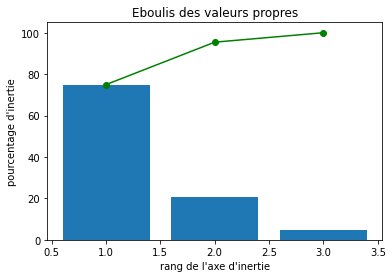

In [74]:
plt.bar(x_list , scree)
plt.plot(x_list , scree_cum , c='green' , marker = 'o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en vert la variance cumulée.

On voit ici que près de 95% de la variance est comprise dans les 2 premières composantes. En clair, la 3e composante n'est pas très *utile*...

## 3.4 Components

Intéressons nous maintenant à nos fameuses composantes. Nous avons dit dans le cours que c'est bien par un calcul que l'on obtient ces composantes.

La formule de ce calcul nous est donnée par l'attribut `components_`. Cette variable est généralement nommée `pcs` :

In [76]:
pcs = pca.components_
pcs

array([[ 0.15632436, -0.98746238, -0.02192585],
       [-0.05991212,  0.01267792, -0.99812314],
       [-0.98588703, -0.15734458,  0.05717909]])

Affichons la même chose mais version `pandas` :

In [77]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2
0,0.156324,-0.987462,-0.021926
1,-0.059912,0.012678,-0.998123
2,-0.985887,-0.157345,0.057179


Intéressant... Mais pas encore très clair...
Continuons le travail :

In [96]:
features = df.columns
pcs.columns = features
pcs.index = ['F'+str(i) for i in x_list]
pcs

,0,1,2
F1,0.16,-0.99,-0.02
F2,-0.06,0.01,-1.00
F3,-0.99,-0.16,0.06


De mieux en mieux !  

-- **ATTENTION** -- : Nous avons arrondi les résultats pour simplifier l'analyse :)



Alors, comment calcule t-on la première composante `F1` ?

et bien c'est assez simple :

`F1 = (0.16 * x) + (-0.99 * y) + (0.02 * z)`

et F2 ?

`F2 = (-0.06 * x) + (-0.01 * y) + (-1.0 * z)`

**Eureka !**



Dans certains cas, on voudra afficher ce dataframe comme cela :

In [89]:
pcs.T

,F1,F2,F3
0,0.16,-0.06,-0.99
1,-0.99,0.01,-0.16
2,-0.02,-1.00,0.06


Et pour une représentation plus *visuelle*, comme cela :

<AxesSubplot:>

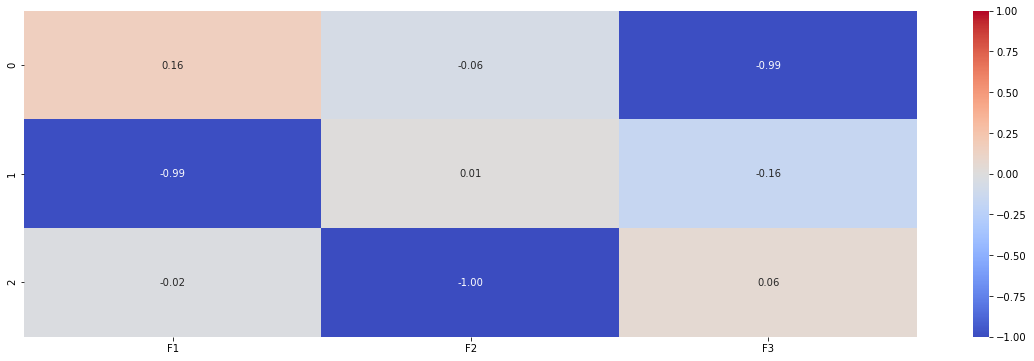

In [95]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=1, vmax=-1, annot=True, cmap="coolwarm", fmt="0.2f")

A ce stade, on sait déja que :  
* `F1+F2 =95%` de la variance.
* `F1 = -y + 'un peu' de x` et `F2 = z`

## 3.5 Correlation graph

Pour la partie graphique, nous allons utiliser les fonctions vues dans la section 1.5.



Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :

In [103]:
x_y = (0,1)

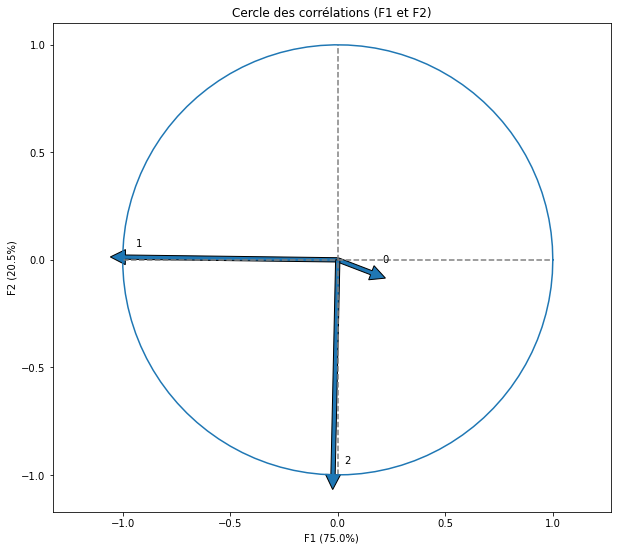

In [104]:
correlation_graph(pca, x_y, features)

Conclusion : F1 est principalement composée de -y et F2 de -z.

## 3.6 Projection

Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [105]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ -2.20046351,  20.7307933 ,   5.03454747],
       [ 17.30217766,  -7.94282125,   1.65613752],
       [  3.18981954, -14.60262524,  -1.65475215],
       [-21.36038293,  -6.10589799,  -5.25201092],
       [ -7.93647975,   6.81509139,   5.8752176 ]])

On rappelle que :

In [113]:
x_y = (0,1)

Essayons avec F1 et F2 :

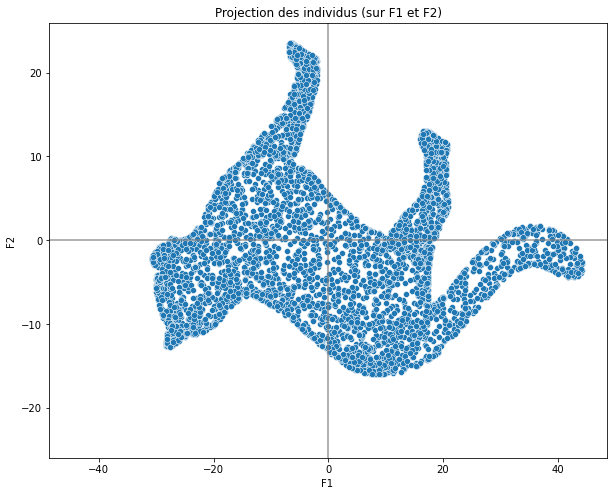

In [114]:
display_factorial_planes(X_proj, x_y)

Ohhhh ... Un chat !

Essayons avec F1 et F3 :

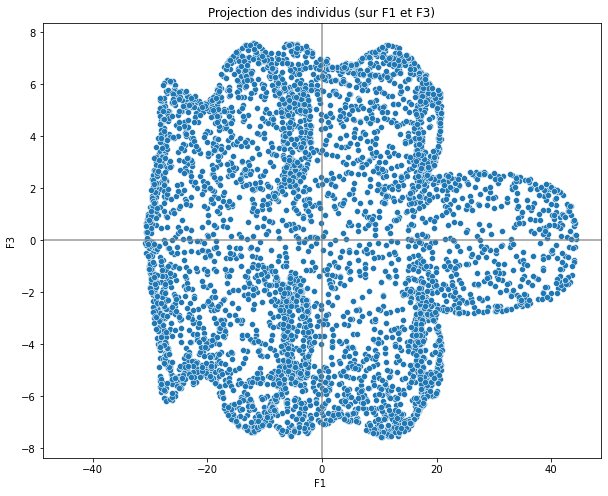

In [115]:
x_y = [0,2]

display_factorial_planes(X_proj, x_y)

Un chat vue de dessous ?

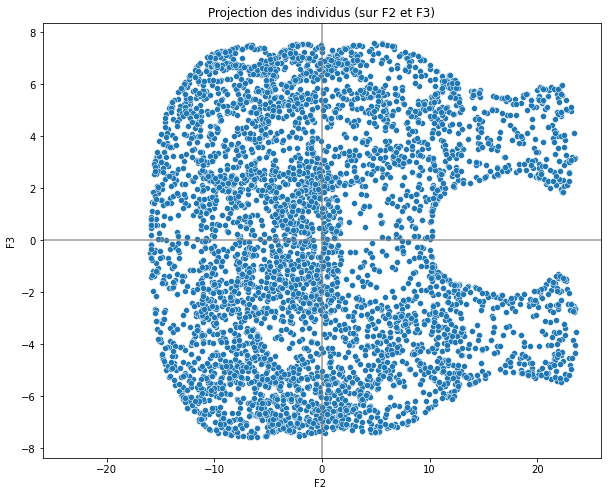

In [117]:
x_y = [1,2]

display_factorial_planes(X_proj, x_y)

Un chat vue de derrière ?

## 3.7 Bonus

Je vous laisse avec un petit bonus. Nous allons utiliser la librairie `plotly` pour faire un affichage en 3 dimensions :

In [118]:
fig = px.scatter_3d(df, x='x', y='y', z='z', opacity=0.3)
fig.show()

NameError: name 'px' is not defined

Passez votre souris sur l'image, vous pourrez zoomer, dézoomer, décaller les axes etc etc.

Magique non ?


Pour en savoir plus, c'est par [ici](https://plotly.com/python/).

# 4 Conclusion

Vous êtes arrivé au bout de ce travail, Bravo!

Il ne reste plus qu'à vous entrainer sur d'autres jeux de données :)

En cas de questions, n'hésitez pas à nous adresser vos questions, remarques ou suggestions sur le [formulaire](https://openclassrooms.zendesk.com/hc/fr/requests/new) .

